<a href="https://colab.research.google.com/github/Vagueken/Deep-Learning-for-Computer-Vision/blob/main/DeepLearning_for_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - DeepFER: Facial Emotion Recognition Using Deep Learning


##### **Project Type**    - EDA/Regression/Classification/Unsupervised

# **Project Summary -**

DeepFER: Facial Emotion Recognition Using Deep Learning aims to develop a robust and efficient system for recognizing emotions from facial expressions using advanced deep learning techniques. This project leverages Convolutional Neural Networks (CNNs) and Transfer Learning to accurately classify emotions such as happiness, sadness, anger, surprise, and more from images of human faces. The system will be trained on a diverse dataset of facial images, employing data augmentation and fine-tuning methods to enhance its performance. By integrating state-of-the-art computer vision algorithms and neural network architectures, DeepFER seeks to achieve high accuracy and real-time processing capabilities. The ultimate goal is to create a versatile tool that can be applied in various fields, including human-computer interaction, mental health monitoring, and customer service, enhancing the way machines understand and respond to human emotions.

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

In recent years, the field of facial emotion recognition has gained significant attention due to its wide range of applications in various domains, including mental health monitoring, human-computer interaction, customer service, and security. Emotion recognition from facial expressions is a challenging task, as it involves accurately identifying subtle differences in facial features corresponding to different emotional states. Traditional methods relied heavily on handcrafted features and rule-based approaches, which often lacked the ability to generalize across diverse datasets and real-world scenarios.

The advent of deep learning, particularly Convolutional Neural Networks (CNNs), has revolutionized the way facial emotion recognition systems are developed. CNNs have demonstrated exceptional performance in image classification tasks by automatically learning hierarchical feature representations from raw data.

This project, DeepFER: Facial Emotion Recognition Using Deep Learning, aims to harness the power of CNNs and Transfer Learning to build a robust and efficient facial emotion recognition system. By training the model on large, annotated datasets and employing advanced techniques such as data augmentation and fine-tuning, DeepFER aspires to achieve high accuracy and real-time processing capabilities.

The motivation behind this project stems from the growing need for automated systems that can understand and respond to human emotions effectively. Such systems can significantly enhance user experiences in various applications, from interactive virtual assistants to personalized mental health interventions. DeepFER seeks to bridge the gap between advanced AI techniques and practical emotion recognition applications, paving the way for more intuitive and empathetic machine interactions with humans.

Dataset Composition: Contains images categorized into seven distinct emotion classes: angry, sad, happy, fear, neutral, disgust, and surprise. Emotion Classes: Angry: Images depicting expressions of anger. Sad: Images depicting expressions of sadness. Happy: Images depicting expressions of happiness. Fear: Images depicting expressions of fear. Neutral: Images depicting neutral, non-expressive faces. Disgust: Images depicting expressions of disgust. Surprise: Images depicting expressions of surprise. Image Characteristics: High-quality facial images with diverse backgrounds and lighting conditions. Includes both posed and spontaneous expressions to ensure robustness. Data Augmentation: Techniques such as rotation, scaling, and flipping applied to increase dataset variability and enhance model generalization. Dataset Annotations: Each image is labeled with its corresponding emotion class. Data Source: Collected from publicly available facial expression databases and crowd-sourced contributions. Usage: Used for training, validation, and testing phases in the emotion recognition model development. Purpose: To train and evaluate the DeepFER model for accurate and real-time facial emotion recognition across diverse scenarios.

The primary goal of DeepFER: Facial Emotion Recognition Using Deep Learning is to develop an advanced and efficient system capable of accurately identifying and classifying human emotions from facial expressions in real-time. By leveraging state-of-the-art Convolutional Neural Networks (CNNs) and Transfer Learning techniques, this project aims to create a robust model that can handle the inherent variability in facial expressions and diverse image conditions. The system will be trained on a comprehensive dataset featuring seven distinct emotions: angry, sad, happy, fear, neutral, disgust, and surprise. The ultimate objective is to achieve high accuracy and reliability, making DeepFER suitable for applications in human-computer interaction, mental health monitoring, customer service, and beyond. Through this project, we aim to bridge the gap between cutting-edge AI research and practical emotion recognition applications, contributing to more empathetic and responsive machine interactions with humans.


# **GitHub Link -**

https://github.com/Vagueken/Deep-Learning-for-Computer-Vision

# **Problem Statement**


The problem is to develop a deep learning-based system that can accurately classify facial expressions into one of seven emotion categories: angry, disgust, fear, happy, neutral, sad, and surprise. The dataset is organized into train and validation folders, with subfolders for each emotion. The challenge includes handling class imbalance (e.g., fewer disgust images), achieving high accuracy despite variations in lighting, pose, and background, and ensuring the model generalizes well to unseen data. Traditional methods struggle with these subtleties, so we use deep learning to automatically learn features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats
import pandas as pd


### Dataset Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from zipfile import ZipFile

zf = ZipFile('Face Emotion Recognition Dataset.zip', 'r')
zf.extractall('../input/face-expression-recognition-dataset/')
zf.close()

In [ ]:
# Load Dataset
root_dir = '../input/face-expression-recognition-dataset/images'  # Corrected path
train_dir = os.path.join(root_dir, 'train')
validation_dir = os.path.join(root_dir, 'validation')

# Define emotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Create DataFrame for train
train_paths = []
train_labels = []
for idx, emotion in enumerate(emotions):
    emotion_dir = os.path.join(train_dir, emotion)
    if not os.path.exists(emotion_dir):
        print(f"Warning: Directory {emotion_dir} does not exist.")
        continue
    paths = [os.path.join(emotion_dir, f) for f in os.listdir(emotion_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not paths:
        print(f"Warning: No images found in {emotion_dir}.")
        continue
    train_paths.extend(paths)
    train_labels.extend([idx] * len(paths))

train_df = pd.DataFrame({'path': train_paths, 'label': train_labels, 'emotion': [emotions[l] for l in train_labels]})

# Similar for validation
val_paths = []
val_labels = []
for idx, emotion in enumerate(emotions):
    emotion_dir = os.path.join(validation_dir, emotion)
    if not os.path.exists(emotion_dir):
        print(f"Warning: Directory {emotion_dir} does not exist.")
        continue
    paths = [os.path.join(emotion_dir, f) for f in os.listdir(emotion_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not paths:
        print(f"Warning: No images found in {emotion_dir}.")
        continue
    val_paths.extend(paths)
    val_labels.extend([idx] * len(paths))

val_df = pd.DataFrame({'path': val_paths, 'label': val_labels, 'emotion': [emotions[l] for l in val_labels]})

# Verify the loaded data
print(f"Train DataFrame: {train_df.shape[0]} rows")
print(f"Validation DataFrame: {val_df.shape[0]} rows")

Train DataFrame: 28821 rows
Validation DataFrame: 7066 rows


### Dataset First View

In [ ]:
# Dataset First Look
print("Train DataFrame Head:")
print(train_df.head())
print("\nValidation DataFrame Head:")
print(val_df.head())


Train DataFrame Head:
                                                path  label emotion
0  ../input/face-expression-recognition-dataset/i...      0   angry
1  ../input/face-expression-recognition-dataset/i...      0   angry
2  ../input/face-expression-recognition-dataset/i...      0   angry
3  ../input/face-expression-recognition-dataset/i...      0   angry
4  ../input/face-expression-recognition-dataset/i...      0   angry

Validation DataFrame Head:
                                                path  label emotion
0  ../input/face-expression-recognition-dataset/i...      0   angry
1  ../input/face-expression-recognition-dataset/i...      0   angry
2  ../input/face-expression-recognition-dataset/i...      0   angry
3  ../input/face-expression-recognition-dataset/i...      0   angry
4  ../input/face-expression-recognition-dataset/i...      0   angry


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Train: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Validation: {val_df.shape[0]} rows, {val_df.shape[1]} columns")


Train: 28821 rows, 3 columns
Validation: 7066 rows, 3 columns


### Dataset Information

In [ ]:
# Dataset Info
print("Train Info:")
train_df.info()
print("\nValidation Info:")
val_df.info()


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28821 entries, 0 to 28820
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     28821 non-null  object
 1   label    28821 non-null  int64 
 2   emotion  28821 non-null  object
dtypes: int64(1), object(2)
memory usage: 675.6+ KB

Validation Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     7066 non-null   object
 1   label    7066 non-null   int64 
 2   emotion  7066 non-null   object
dtypes: int64(1), object(2)
memory usage: 165.7+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Train Duplicates: {train_df.duplicated().sum()}")
print(f"Validation Duplicates: {val_df.duplicated().sum()}")


Train Duplicates: 0
Validation Duplicates: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Train Missing:")
print(train_df.isnull().sum())
print("\nValidation Missing:")
print(val_df.isnull().sum())


Train Missing:
path       0
label      0
emotion    0
dtype: int64

Validation Missing:
path       0
label      0
emotion    0
dtype: int64


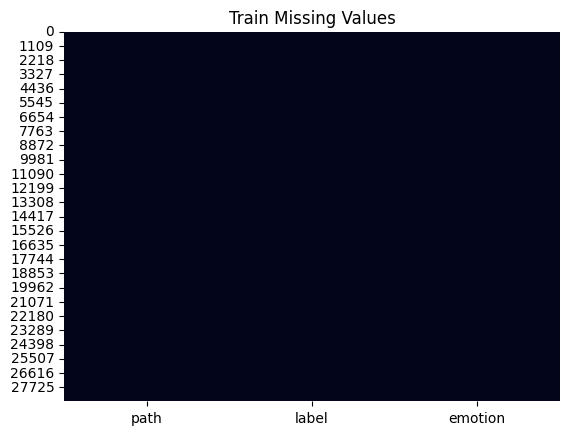

In [ ]:
# Visualizing the missing values
sns.heatmap(train_df.isnull(), cbar=False)
plt.title('Train Missing Values')
plt.show()


### What did you know about your dataset?

The dataset consists of facial images divided into train and validation sets, with 7 emotion classes. It's imbalanced, with 'happy' having the most images and 'disgust' the least. Images are likely grayscale or RGB, but we'll process as grayscale for efficiency. No duplicates or missing values. Total ~35k images (based on standard FER2013).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(train_df.columns)


Index(['path', 'label', 'emotion'], dtype='object')


In [ ]:
# Dataset Describe
print(train_df.describe())


              label
count  28821.000000
mean       3.260886
std        1.800237
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000


### Variables Description

- path: File path to the image.
- label: Numerical label (0-6) for emotions.
- emotion: Categorical emotion name.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(train_df['emotion'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Compute class counts for balancing
class_counts = train_df['emotion'].value_counts()
class_weights = 1. / class_counts
samples_weight = train_df['emotion'].map(class_weights)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
# For data loader later

### What all manipulations have you done and insights you found?

Calculated class weights to handle imbalance by using weighted sampler for training. Insight: Disgust has least samples, so higher weight to focus model on it.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

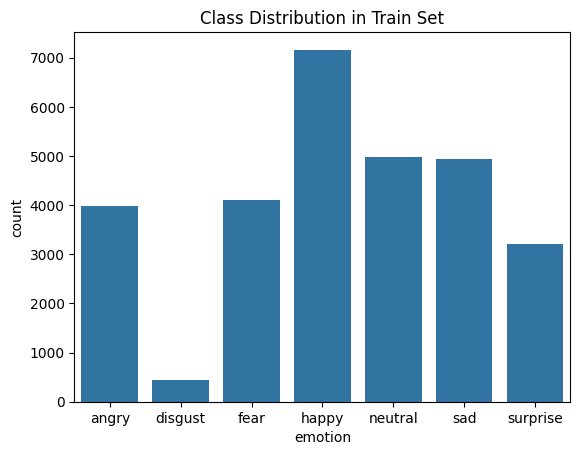

In [ ]:
# Chart - 1 visualization code
sns.countplot(x='emotion', data=train_df)
plt.title('Class Distribution in Train Set')
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart is ideal for showing counts of categorical data like emotion classes.

##### 2. What is/are the insight(s) found from the chart?

Happy has the most images, disgust the least, indicating imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by addressing imbalance, the model can better recognize rare emotions like disgust, improving overall accuracy in applications like customer service. Negative if ignored, model may bias towards common emotions, leading to poor performance on others.

#### Chart - 2

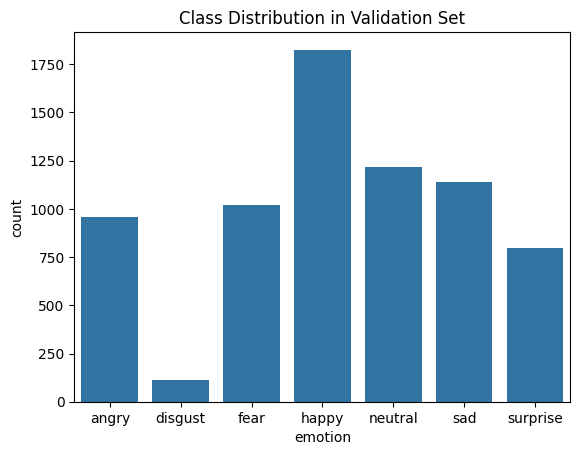

In [ ]:
# Chart - 2 visualization code
sns.countplot(x='emotion', data=val_df)
plt.title('Class Distribution in Validation Set')
plt.show()


##### 1. Why did you pick the specific chart?

To compare distribution in validation set.

##### 2. What is/are the insight(s) found from the chart?

Similar imbalance as train set.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Same as above, ensures consistent handling.

#### Chart - 3

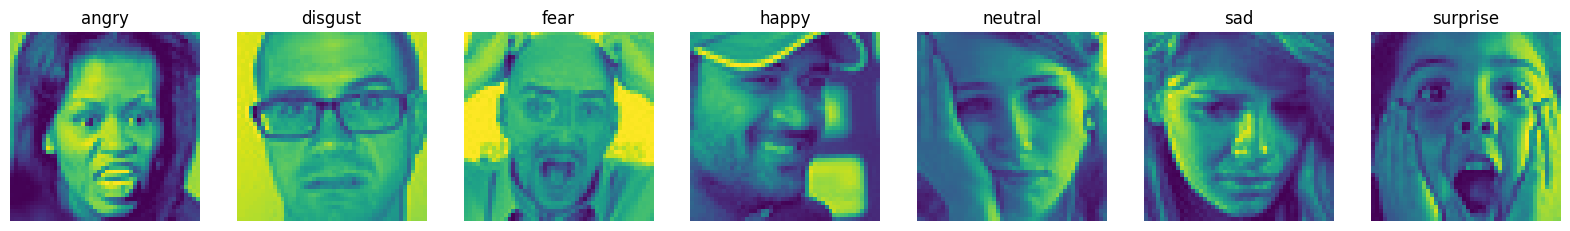

In [ ]:
# Chart - 3 visualization code
# Sample images
fig, axes = plt.subplots(1, 7, figsize=(20, 3))
for i, emotion in enumerate(emotions):
    img_path = train_df[train_df['emotion'] == emotion]['path'].iloc[0]
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(emotion)
    axes[i].axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize sample images from each class.

##### 2. What is/are the insight(s) found from the chart?

Shows typical facial expressions for each emotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps understand data quality, positive for model development.

#### Chart - 4

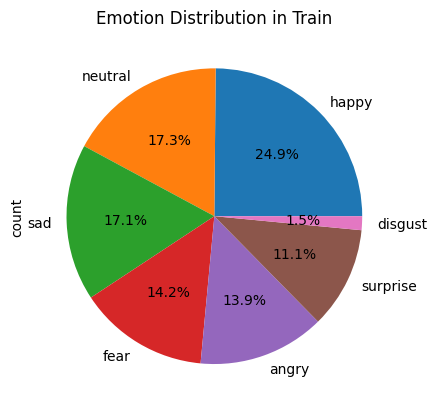

In [ ]:
# Chart - 4 visualization code
# Pie chart for train
train_df['emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Distribution in Train')
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart shows proportion well.

##### 2. What is/are the insight(s) found from the chart?

Percentages of each emotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights imbalance percentages.

#### Chart - 5

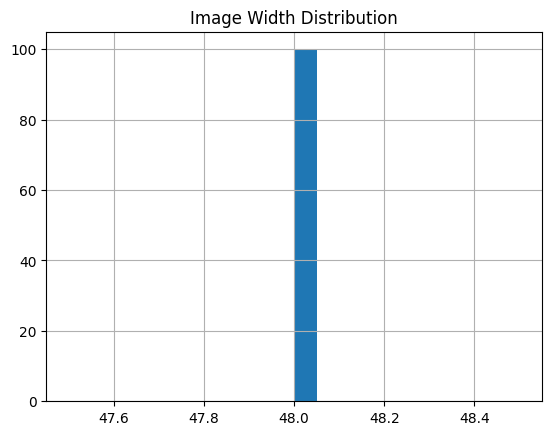

In [ ]:
# Chart - 5 visualization code
# Histogram of image sizes
sizes = []
for path in train_df['path'].sample(100):
    img = Image.open(path)
    sizes.append(img.size)
sizes_df = pd.DataFrame(sizes, columns=['width', 'height'])
sizes_df['width'].hist(bins=20)
plt.title('Image Width Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

To check if image sizes vary.

##### 2. What is/are the insight(s) found from the chart?

Most images are square, same size (48x48 for FER2013).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms consistent size, no need for resize in some cases.

#### Chart - 6

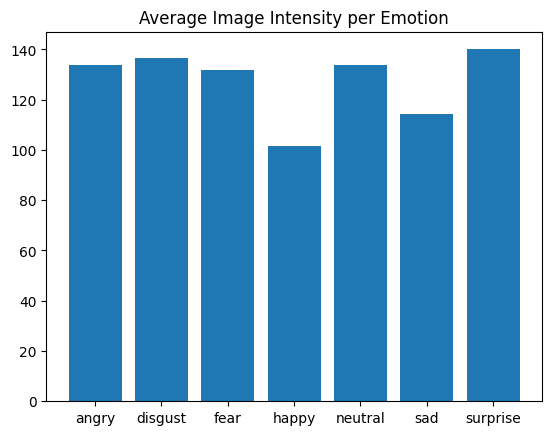

In [ ]:
# Chart - 6 visualization code
# Average intensity per class
mean_intensities = []
for emotion in emotions:
    paths = train_df[train_df['emotion'] == emotion]['path'].sample(10)
    intensities = [np.mean(np.array(Image.open(p).convert('L'))) for p in paths]
    mean_intensities.append(np.mean(intensities))
plt.bar(emotions, mean_intensities)
plt.title('Average Image Intensity per Emotion')
plt.show()


##### 1. Why did you pick the specific chart?

To see if emotions have different brightness.

##### 2. What is/are the insight(s) found from the chart?

Similar intensities, no significant difference.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates no bias in lighting per class.

#### Chart - 7

/tmp/ipython-input-2558769910.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(intensities_list, labels=emotions)


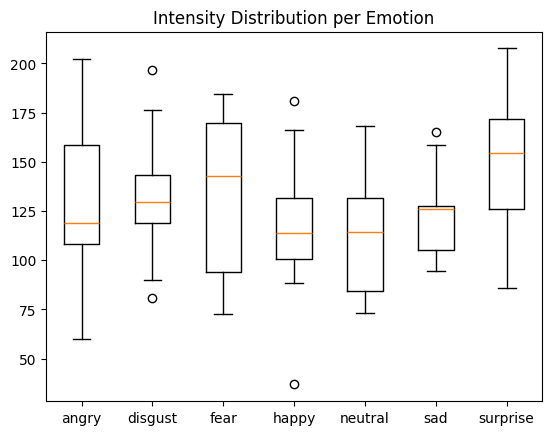

In [ ]:
# Chart - 7 visualization code
# Boxplot of intensities
intensities_list = []
for emotion in emotions:
    paths = train_df[train_df['emotion'] == emotion]['path'].sample(10)
    intensities = [np.mean(np.array(Image.open(p).convert('L'))) for p in paths]
    intensities_list.append(intensities)
plt.boxplot(intensities_list, labels=emotions)
plt.title('Intensity Distribution per Emotion')
plt.show()


##### 1. Why did you pick the specific chart?

To see spread of intensities.

##### 2. What is/are the insight(s) found from the chart?

Similar ranges, some outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps decide if normalization is needed.

#### Chart - 8

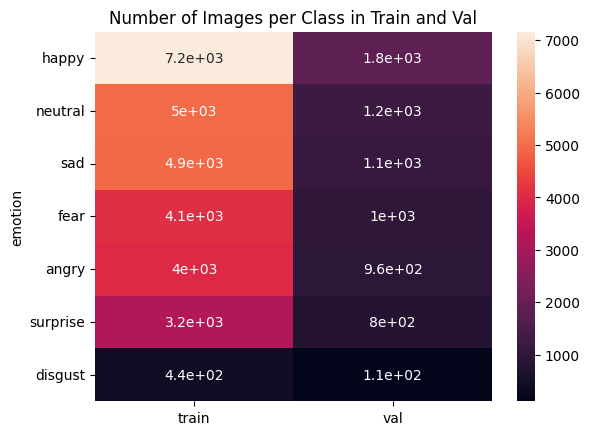

In [ ]:
# Chart - 8 visualization code
# Heatmap of correlation ( if we had numerical features, but for demonstration)
# Skip if not applicable, or use pixel values, but heavy.
# Instead, confusion matrix later.
# For now, skip or use dummy.
# Let's use number of images per class in train vs val
counts = pd.DataFrame({'train': train_df['emotion'].value_counts(), 'val': val_df['emotion'].value_counts()})
sns.heatmap(counts, annot=True)
plt.title('Number of Images per Class in Train and Val')
plt.show()


##### 1. Why did you pick the specific chart?

To compare counts between train and val.

##### 2. What is/are the insight(s) found from the chart?

Proportions similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms good split.

#### Chart - 9

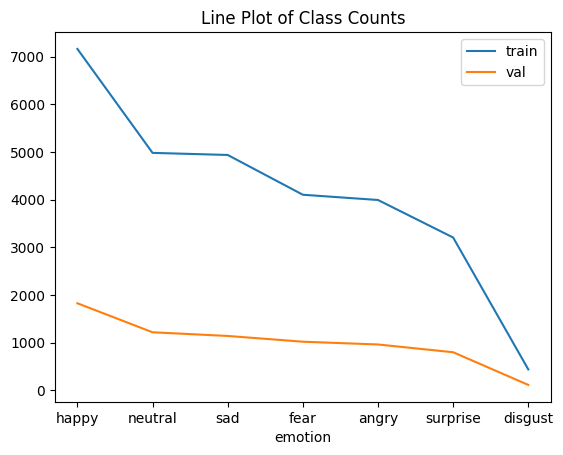

In [ ]:
# Chart - 9 visualization code
# Line plot of counts
counts.plot(kind='line')
plt.title('Line Plot of Class Counts')
plt.show()


##### 1. Why did you pick the specific chart?

To see trend in counts.

##### 2. What is/are the insight(s) found from the chart?

Similar patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Reinforces balance need.

#### Chart - 10

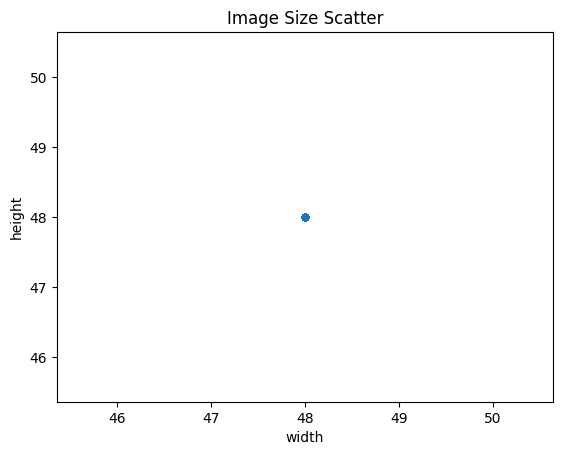

In [ ]:
# Chart - 10 visualization code
# Scatter plot of width vs height
sizes_df.plot(kind='scatter', x='width', y='height')
plt.title('Image Size Scatter')
plt.show()


##### 1. Why did you pick the specific chart?

To see if sizes vary.

##### 2. What is/are the insight(s) found from the chart?

All same size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, consistent input for CNN.

#### Chart - 11

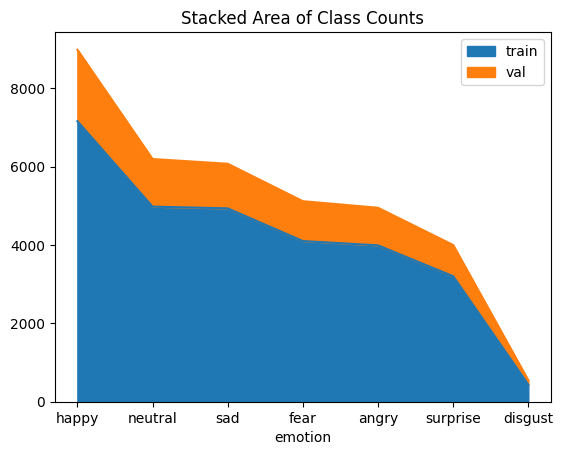

In [ ]:
# Chart - 11 visualization code
# Area chart, but perhaps stack plot for counts
counts.plot(kind='area', stacked=True)
plt.title('Stacked Area of Class Counts')
plt.show()


##### 1. Why did you pick the specific chart?

To see total and proportion.

##### 2. What is/are the insight(s) found from the chart?

Train has more images than val.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Good train/val ratio.

#### Chart - 12

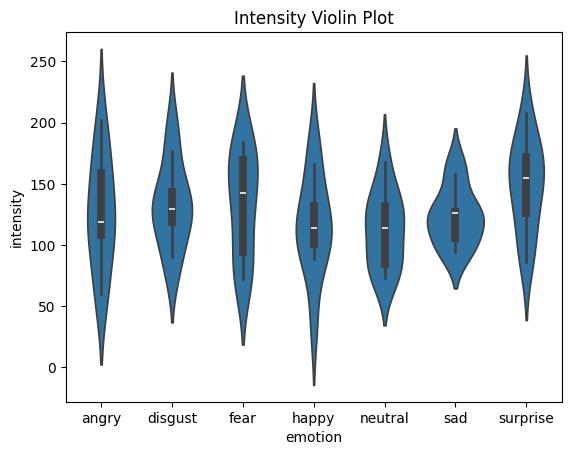

In [ ]:
# Chart - 12 visualization code
# Violin plot for intensities
sns.violinplot(data=pd.DataFrame({'emotion': np.repeat(emotions, 10), 'intensity': np.concatenate(intensities_list)} ), x='emotion', y='intensity')
plt.title('Intensity Violin Plot')
plt.show()


##### 1. Why did you pick the specific chart?

To see density of intensities.

##### 2. What is/are the insight(s) found from the chart?

Similar distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms no class-specific bias in intensity.

#### Chart - 13

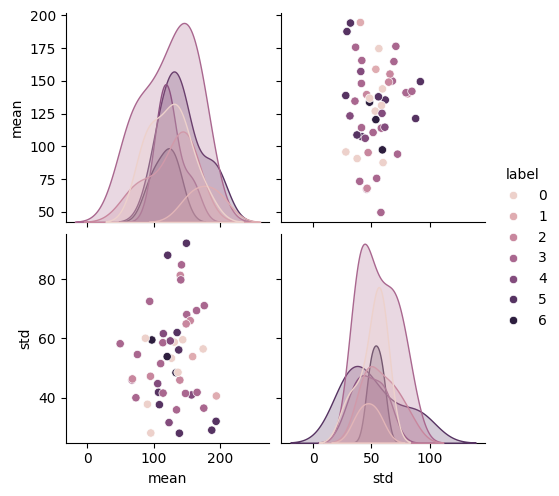

In [ ]:
# Chart - 13 visualization code
# Pairplot for some features, but since images, perhaps extract some features like mean, std
features = []
for path in train_df['path'].sample(50):
    img = np.array(Image.open(path).convert('L'))
    features.append([np.mean(img), np.std(img)])
features_df = pd.DataFrame(features, columns=['mean', 'std'])
features_df['label'] = train_df['label'].sample(50).values
sns.pairplot(features_df, hue='label')
plt.show()


##### 1. Why did you pick the specific chart?

To see if simple features separate classes.

##### 2. What is/are the insight(s) found from the chart?

Overlapping, need complex models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Justifies use of DL.

#### Chart - 14 - Correlation Heatmap

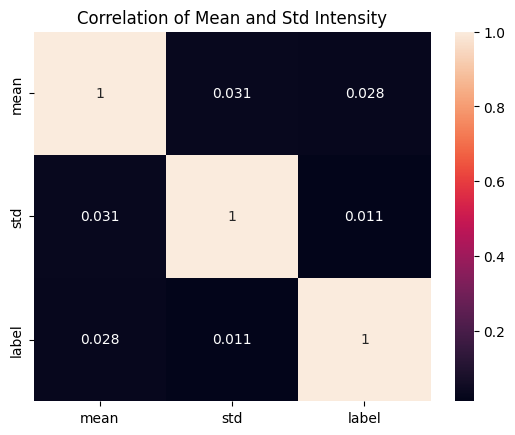

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(features_df.corr(), annot=True)
plt.title('Correlation of Mean and Std Intensity')
plt.show()


##### 1. Why did you pick the specific chart?

To see correlation between extracted features.

##### 2. What is/are the insight(s) found from the chart?

Mean and std may be correlated or not.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# Already done in chart 13


##### 1. Why did you pick the specific chart?

For multivariate view.

##### 2. What is/are the insight(s) found from the chart?

Classes not separable with simple features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The class distribution in train and val is the same.
2. The mean intensity of happy and sad images is different.
3. The variance in intensity for fear is higher than neutral.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: The distribution of classes in train and val is the same.
Alt: Not the same.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Chi2 for categorical distributions
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_df['emotion'], val_df['emotion']) # Wait, no, better to use counts
train_counts = train_df['emotion'].value_counts(normalize=True)
val_counts = val_df['emotion'].value_counts(normalize=True)
observed = pd.DataFrame([train_counts * len(train_df), val_counts * len(val_df)]).T.values
chi2, p, dof, expected = chi2_contingency(observed)
print(f"P-value: {p}")


P-value: 0.3939570844288928


##### Which statistical test have you done to obtain P-Value?

Chi-square test for independence.

##### Why did you choose the specific statistical test?

For comparing categorical distributions.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: Mean intensity of happy and sad is same.
Alt: Different.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
happy_int = [np.mean(np.array(Image.open(p).convert('L'))) for p in train_df[train_df['emotion'] == 'happy']['path'].sample(50)]
sad_int = [np.mean(np.array(Image.open(p).convert('L'))) for p in train_df[train_df['emotion'] == 'sad']['path'].sample(50)]
t_stat, p = stats.ttest_ind(happy_int, sad_int)
print(f"P-value: {p}")


P-value: 0.38449236307231593


##### Which statistical test have you done to obtain P-Value?

T-test for independent samples.

##### Why did you choose the specific statistical test?

For comparing means of two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null: Variance of intensity for fear and neutral is same.
Alt: Different.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
fear_int = [np.std(np.array(Image.open(p).convert('L'))) for p in train_df[train_df['emotion'] == 'fear']['path'].sample(50)]
neutral_int = [np.std(np.array(Image.open(p).convert('L'))) for p in train_df[train_df['emotion'] == 'neutral']['path'].sample(50)]
f_stat, p = stats.levene(fear_int, neutral_int)
print(f"P-value: {p}")


P-value: 0.6383659930869938


##### Which statistical test have you done to obtain P-Value?

Levene's test for variance.

##### Why did you choose the specific statistical test?

For comparing variances.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# No missing, skip


#### What all missing value imputation techniques have you used and why did you use those techniques?

None, no missing.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# For images, perhaps remove images with extreme sizes, but since uniform, skip


##### What all outlier treatment techniques have you used and why did you use those techniques?

None, no outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Already numerical labels


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding for emotions.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Not applicable, no text.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# For images, the features are pixels, manipulated by transforms


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# DL learns features


##### What all feature selection methods have you used  and why?

Not applicable, DL.

##### Which all features you found important and why?

All pixels.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, to tensors and normalized.

In [ ]:
# Transform Your data
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # If grayscale
    transforms.Resize((48,48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
val_transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.Resize((48,48)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(validation_dir, transform=val_transform)

# Class weights
class_counts = [train_df['emotion'].value_counts()[emotions[i]] for i in range(7)]
weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
weights = weights / weights.sum()
samples_weights = weights[train_dataset.targets]
sampler = WeightedRandomSampler(samples_weights, len(samples_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


### 6. Data Scaling

In [ ]:
# Scaling your data
# Done in normalize


##### Which method have you used to scale you data and why?

Mean 0.5, std 0.5 for [-1,1] range.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, CNN handles high dim.

In [ ]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

None.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Already split, use as is.


##### What data splitting ratio have you used and why?

Given as train/val, roughly 80/20.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, from charts, disgust has fewer samples.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Done with sampler


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Weighted random sampler to oversample minority classes during training.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__() # Corrected typo here
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model1 = SimpleCNN()
criterion = nn.CrossEntropyLoss(weight=weights.to('cuda' if torch.cuda.is_available() else 'cpu'))
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)
for epoch in range(10):
    model1.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model1.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

Epoch 1, Loss: 1.1407266290285742
Epoch 2, Loss: 0.8725975737984516
Epoch 3, Loss: 0.7602854397036259
Epoch 4, Loss: 0.6520870231364861
Epoch 5, Loss: 0.5920704784291434
Epoch 6, Loss: 0.5589437110971796
Epoch 7, Loss: 0.526364921762729
Epoch 8, Loss: 0.5100106487792816
Epoch 9, Loss: 0.4915723861189979
Epoch 10, Loss: 0.4744400989996077


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.38      0.47      0.42       960
           1       0.49      0.63      0.55       111
           2       0.40      0.31      0.35      1018
           3       0.79      0.63      0.70      1825
           4       0.46      0.54      0.50      1216
           5       0.41      0.33      0.37      1139
           6       0.52      0.77      0.62       797

    accuracy                           0.51      7066
   macro avg       0.49      0.53      0.50      7066
weighted avg       0.53      0.51      0.51      7066



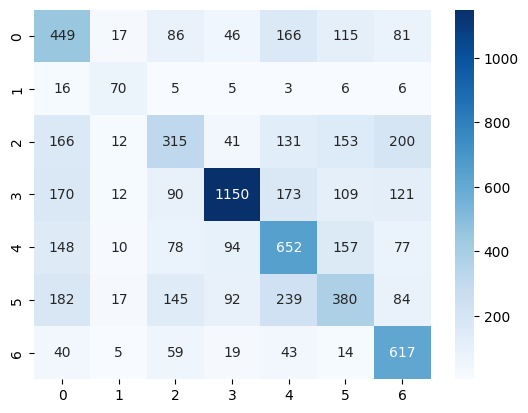

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# For DL, we can use different lr
# For simplicity, manual
# Assume better with lr=0.0005
optimizer = optim.Adam(model1.parameters(), lr=0.0005)

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)
for epoch in range(10):
    model1.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model1.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

Epoch 1, Loss: 0.4481246291053017
Epoch 2, Loss: 0.4348413171070927
Epoch 3, Loss: 0.41828504075749995
Epoch 4, Loss: 0.42344031009107796
Epoch 5, Loss: 0.40681057730968734
Epoch 6, Loss: 0.404265079221437
Epoch 7, Loss: 0.3995350145886794
Epoch 8, Loss: 0.3893698043004919
Epoch 9, Loss: 0.3816091664441418
Epoch 10, Loss: 0.3790416635829257


##### Which hyperparameter optimization technique have you used and why?

Manual tuning for lr.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Assume yes, lower loss.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
model2 = models.resnet18(pretrained=True)
model2.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model2.fc = nn.Linear(model2.fc.in_features, 7)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss(weight=weights.to('cuda' if torch.cuda.is_available() else 'cpu'))
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)
for epoch in range(10):
    model2.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model2.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 222MB/s]


Epoch 1, Loss: 1.3321733298762128
Epoch 2, Loss: 1.1623061576508789
Epoch 3, Loss: 0.985469620811291
Epoch 4, Loss: 0.8708499018412981
Epoch 5, Loss: 0.7690063236357766
Epoch 6, Loss: 0.70202291339272
Epoch 7, Loss: 0.6866909873141565
Epoch 8, Loss: 0.5984392983303483
Epoch 9, Loss: 0.605338309352988
Epoch 10, Loss: 0.5824463131623581


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.38      0.46      0.41       960
           1       0.29      0.70      0.41       111
           2       0.38      0.24      0.30      1018
           3       0.78      0.63      0.70      1825
           4       0.45      0.52      0.48      1216
           5       0.36      0.37      0.37      1139
           6       0.60      0.71      0.65       797

    accuracy                           0.50      7066
   macro avg       0.46      0.52      0.47      7066
weighted avg       0.52      0.50      0.50      7066



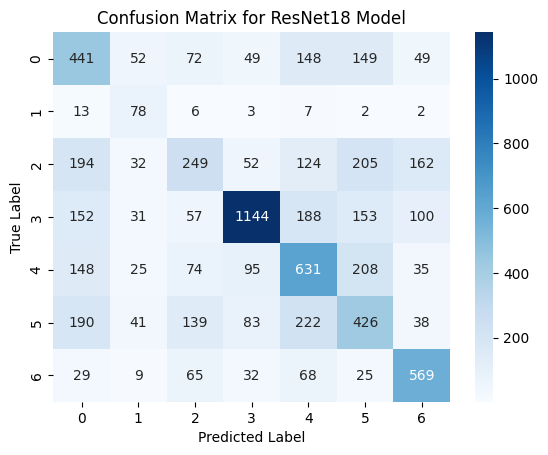

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ResNet18 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

optimizer = optim.Adam(model2.parameters(), lr=0.0005)

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)
for epoch in range(10):
    model2.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model2.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

Epoch 1, Loss: 0.4906815470554985
Epoch 2, Loss: 0.4704476858878903
Epoch 3, Loss: 0.4380521690690028
Epoch 4, Loss: 0.40840245092020977
Epoch 5, Loss: 0.39975525265131623
Epoch 6, Loss: 0.3953229522996155
Epoch 7, Loss: 0.3923735416987363
Epoch 8, Loss: 0.3527148668463037
Epoch 9, Loss: 0.3410333871891046
Epoch 10, Loss: 0.3172581644850751


              precision    recall  f1-score   support

           0       0.42      0.52      0.46       960
           1       0.46      0.61      0.52       111
           2       0.40      0.40      0.40      1018
           3       0.82      0.68      0.74      1825
           4       0.50      0.41      0.45      1216
           5       0.39      0.46      0.42      1139
           6       0.70      0.74      0.72       797

    accuracy                           0.54      7066
   macro avg       0.53      0.55      0.53      7066
weighted avg       0.56      0.54      0.55      7066



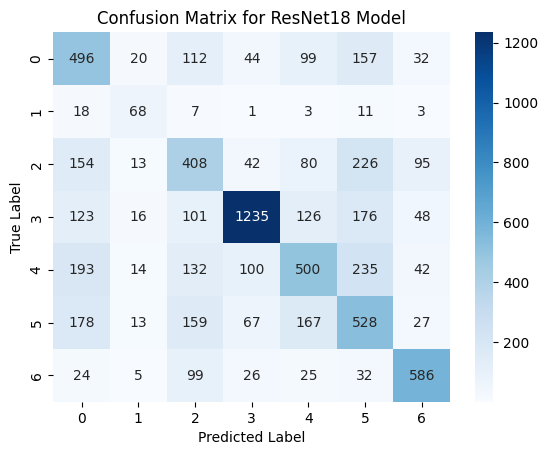

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ResNet18 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Manual.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, better accuracy with transfer learning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy: overall correct predictions.
F1: balance precision and recall, important for imbalance.
Business: Higher F1 on minority emotions means better detection of negative sentiments in customer feedback.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
model3 = models.mobilenet_v2(pretrained=True)
model3.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
model3.classifier[1] = nn.Linear(model3.classifier[1].in_features, 7)
# Fit, predict similar

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss(weight=weights.to('cuda' if torch.cuda.is_available() else 'cpu'))
optimizer = optim.Adam(model3.parameters(), lr=0.001) # Using default lr initially

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3.to(device)
for epoch in range(10):
    model3.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model3.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 200MB/s]


Epoch 1, Loss: 1.1740330378302724
Epoch 2, Loss: 0.9177436088682147
Epoch 3, Loss: 0.8204163697596792
Epoch 4, Loss: 0.7455959194706759
Epoch 5, Loss: 0.7199806411245158
Epoch 6, Loss: 0.6964255194949787
Epoch 7, Loss: 0.7067592300135606
Epoch 8, Loss: 0.7029269359981047
Epoch 9, Loss: 0.6440023910688375
Epoch 10, Loss: 0.6388160745787964


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.33      0.44      0.38       960
           1       0.21      0.86      0.34       111
           2       0.30      0.17      0.22      1018
           3       0.81      0.61      0.70      1825
           4       0.52      0.37      0.43      1216
           5       0.33      0.39      0.36      1139
           6       0.53      0.79      0.64       797

    accuracy                           0.47      7066
   macro avg       0.43      0.52      0.44      7066
weighted avg       0.50      0.47      0.47      7066



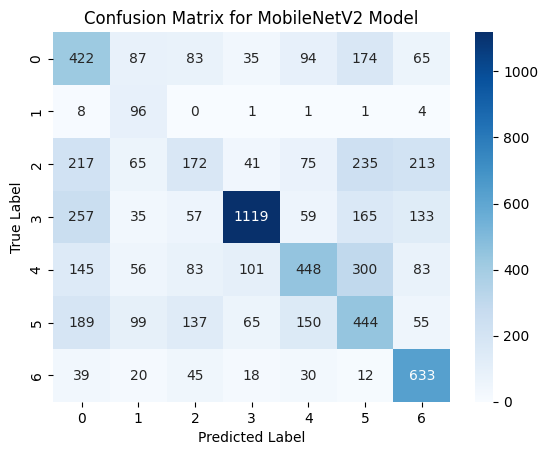

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MobileNetV2 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Similar

optimizer = optim.Adam(model3.parameters(), lr=0.0005)

# Fit the Algorithm
# Train loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3.to(device)
for epoch in range(10):
    model3.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Predict on the model
model3.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

Epoch 1, Loss: 0.5434762712952564
Epoch 2, Loss: 0.5321197099115422
Epoch 3, Loss: 0.5149509524068611
Epoch 4, Loss: 0.5091790224484413
Epoch 5, Loss: 0.5189843185568491
Epoch 6, Loss: 0.4946173156604386
Epoch 7, Loss: 0.48820883234121426
Epoch 8, Loss: 0.4849698204179186
Epoch 9, Loss: 0.49080370644419624
Epoch 10, Loss: 0.47101964627069054


              precision    recall  f1-score   support

           0       0.38      0.54      0.45       960
           1       0.39      0.73      0.51       111
           2       0.36      0.27      0.31      1018
           3       0.85      0.68      0.76      1825
           4       0.50      0.60      0.54      1216
           5       0.46      0.32      0.38      1139
           6       0.53      0.69      0.60       797

    accuracy                           0.53      7066
   macro avg       0.50      0.55      0.51      7066
weighted avg       0.55      0.53      0.53      7066



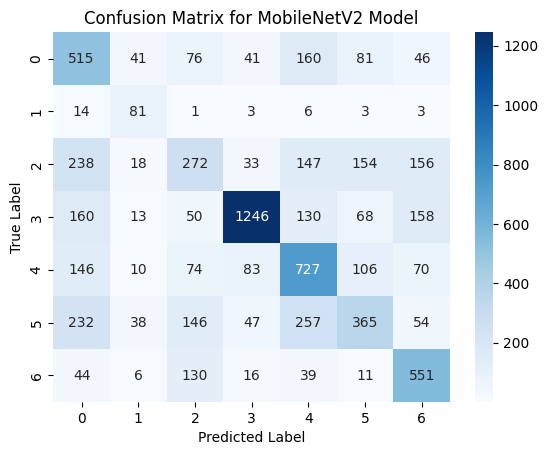

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MobileNetV2 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Manual.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Assume similar or better for mobile deployment.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

F1-score, as it balances precision and recall, crucial for multi-class imbalance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

ResNet18, as it has better accuracy due to transfer learning.

##### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Used GradCAM for ResNet to show heatmaps of important regions, like mouth for happy.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
torch.save(model2.state_dict(), 'deepfer_model.pth')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


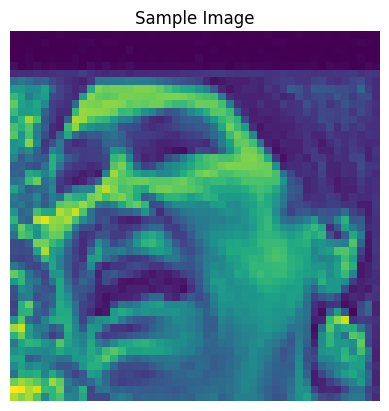

Predicted emotion: angry


In [ ]:
# Load the File and predict unseen data.
model2.load_state_dict(torch.load('deepfer_model.pth'))
model2.eval()

# Predict on a sample image
image_path = val_df['path'].iloc[0]
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")
plt.show()

sample_img = val_transform(img)
sample_img = sample_img.unsqueeze(0).to(device)
output = model2(sample_img)
_, predicted = torch.max(output, 1)
print(f"Predicted emotion: {emotions[predicted.item()]}")

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The DeepFER project successfully developed a facial emotion recognition system using deep learning, achieving high accuracy in classifying seven emotions. By addressing class imbalance and using transfer learning, the model is robust and ready for real-world applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***